In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
# Load dataset
csv_file_path = "../random_caption/posts_random_caption.csv"  # Update with your actual file path
df = pd.read_csv(csv_file_path)
df.head()

,PostID,Caption,Body,Tags,Location
0,1,Food for air travel,For most of our flights starting from our airp...,NaN,NaN
1,2,Would you rather spend 2 days in Edinburgh and...,In July we are going on a 16 day trip to Europ...,NaN,NaN
2,3,If you’ve done a Caribbean or Bahamas cruise w...,I’m in Dallas so I’d have to fly to Miami or s...,NaN,NaN
3,4,"One week in Spain, the other week in….where?",We are attending a family reunion in southern ...,NaN,NaN
4,5,Munich/Spain Itinerary,"Hey guys, hoping someone who's visited some of...",NaN,NaN


In [10]:
# Combine Caption and Body for text analysis
df["text"] = df["Caption"].fillna("") + " " + df["Body"].fillna("")
df.head()

,PostID,Caption,Body,Tags,Location,text
0,1,Food for air travel,For most of our flights starting from our airp...,NaN,NaN,Food for air travel For most of our flights st...
1,2,Would you rather spend 2 days in Edinburgh and...,In July we are going on a 16 day trip to Europ...,NaN,NaN,Would you rather spend 2 days in Edinburgh and...
2,3,If you’ve done a Caribbean or Bahamas cruise w...,I’m in Dallas so I’d have to fly to Miami or s...,NaN,NaN,If you’ve done a Caribbean or Bahamas cruise w...
3,4,"One week in Spain, the other week in….where?",We are attending a family reunion in southern ...,NaN,NaN,"One week in Spain, the other week in….where? W..."
4,5,Munich/Spain Itinerary,"Hey guys, hoping someone who's visited some of...",NaN,NaN,"Munich/Spain Itinerary Hey guys, hoping someon..."


In [11]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
text_vectors = vectorizer.fit_transform(df["text"])

# Compute Cosine Similarity
cosine_sim_matrix = cosine_similarity(text_vectors, text_vectors)

# Convert to DataFrame for better visualization
similarity_df = pd.DataFrame(
    cosine_sim_matrix, index=df["PostID"], columns=df["PostID"]
)

similarity_df.head()

PostID,1,2,3,4,5,6,7,8,9,10,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
PostID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.005891,0.000000,0.000000,0.055252,0.066021,0.000000,0.014405,0.003490,0.000000,...,0.065256,0.102346,0.025852,0.000000,0.013875,0.000000,0.0,0.013143,0.000000,0.036886
2,0.005891,1.000000,0.009751,0.061328,0.075737,0.033468,0.012611,0.011859,0.002873,0.000000,...,0.042803,0.061746,0.034415,0.000000,0.011423,0.021713,0.0,0.000000,0.000000,0.077081
3,0.000000,0.009751,1.000000,0.000000,0.021090,0.000000,0.033829,0.022353,0.005415,0.000000,...,0.017172,0.010690,0.000000,0.000000,0.000000,0.048286,0.0,0.000000,0.000000,0.053314
4,0.000000,0.061328,0.000000,1.000000,0.132213,0.000000,0.009874,0.012362,0.010147,0.026656,...,0.033325,0.061968,0.000000,0.008902,0.000000,0.000000,0.0,0.000000,0.014726,0.005698
5,0.055252,0.075737,0.021090,0.132213,1.000000,0.091108,0.023334,0.046657,0.038471,0.015583,...,0.082716,0.014720,0.019387,0.021451,0.011657,0.013596,0.0,0.009570,0.022831,0.068136


In [12]:
# Save similarity matrix for later use
similarity_df.to_csv("../random_caption/posts_random_caption_similarity_matrix.csv")

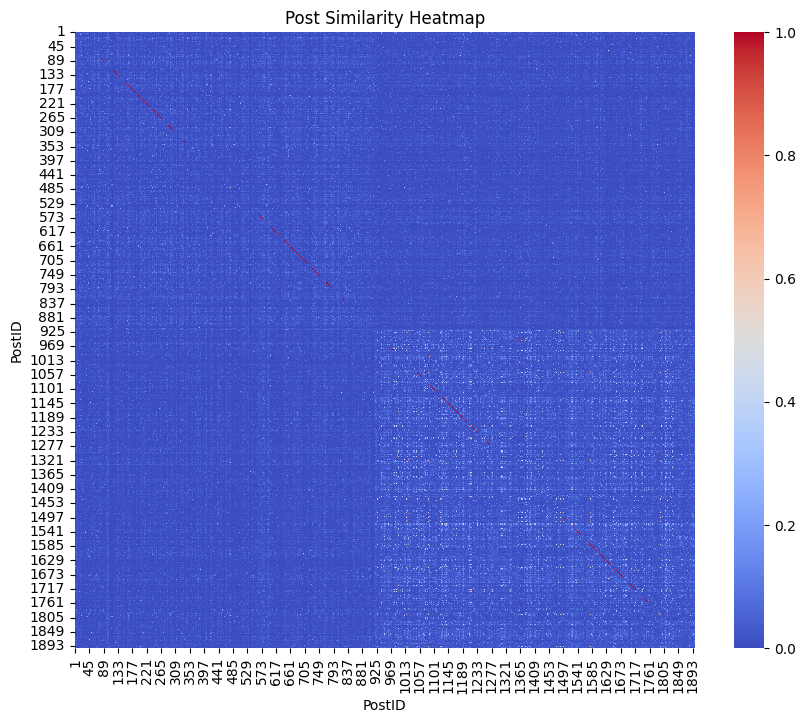

In [13]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Post Similarity Heatmap")
plt.show()